# Unit 7 Lecture 1 - Linear Programming
ESI4628: Decision Support Systems for Industrial Engineers
University of Central Florida Dr. Ivan Garibay, Ramya Akula, Mostafa Saeidi, Madeline Schiappa, and Brett Belcher. https://github.com/igaribay/DSSwithPython/blob/master/DSS-Week07/Notebook/DSS-Unit07-Lecture01.2018.ipynb

## Notebook Learning Objectives
- Visualize a linear relationships
- Solve a linear programming problem using Pulp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pulp

In [3]:
x = np.linspace(0,20,2000)
y1 = x*0 + 2
y2 = (25 - x)/2.0
y3 = (2*x - 8)/4.0
y4 = (2*x - 5)

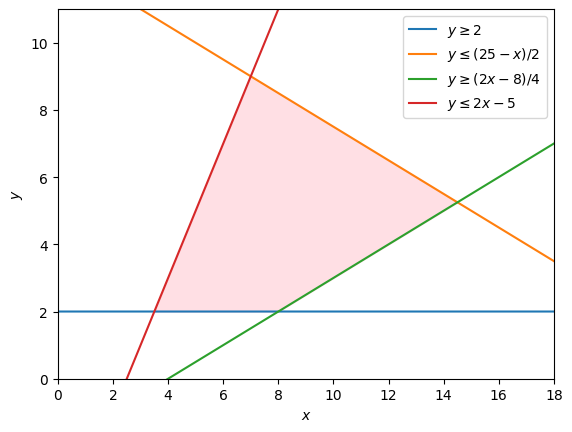

In [4]:
plt.plot(x, y1, label = r'$y\geq2$')
plt.plot(x, y2, label = r'$y\leq (25-x)/2$')
plt.plot(x, y3, label = r'$y\geq (2x-8)/4$')
plt.plot(x, y4, label = r'$y\leq 2x-5$')
plt.xlim(0,18)
plt.ylim(0,11)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

y5 = np.minimum(y2,y4)
y6 = np.maximum(y1,y3)
plt.fill_between(x, y5,y6, where=y5>y6, color = 'pink', alpha=0.5)
plt.legend(bbox_to_anchor = (1.0,1.0), loc='upper right')

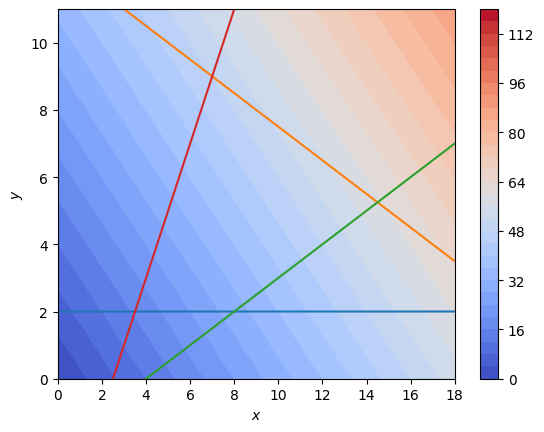

In [5]:
plt.plot(x, y1, label = r'$y\geq2$')
plt.plot(x, y2, label = r'$y\leq (25-x)/2$')
plt.plot(x, y3, label = r'$y\geq (2x-8)/4$')
plt.plot(x, y4, label = r'$y\leq 2x-5$')
plt.xlim(0,18)
plt.ylim(0,11)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

def f(x,y):
    return 3*x+3*y

x = np.linspace(0,20,2000)
y = np.linspace(0,20,2000)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.contourf(X,Y,Z, 30, cmap='coolwarm')
plt.colorbar()

In [6]:
my_lp_Problem = pulp.LpProblem('my_lp_problem',pulp.LpMaximize)

In [7]:
x = pulp.LpVariable('x', lowBound=0, upBound=None, cat='continuous')
y = pulp.LpVariable('y', lowBound=2, upBound=None, cat='continuous')

In [8]:
my_lp_Problem += 4 * x + 3 * y, "Z"

In [9]:
my_lp_Problem += 2*y <= 25-x
my_lp_Problem += 4*y >= 2*x-8
my_lp_Problem += y <= 2*x-5

In [10]:
my_lp_Problem.solve()

1

In [11]:
print("Status:", pulp.LpStatus[my_lp_Problem.status])

Status: Optimal


In [12]:
print(x.name, x.varValue)
print(y.name, y.varValue)
print(pulp.value(my_lp_Problem.objective))

x 14.5
y 5.25
73.75


In [13]:
lpp_2 = pulp.LpProblem('Profit_maximising_problem',pulp.LpMaximize )
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

In [14]:
lpp_2 += 30000 * A+ 45000 * B, 'Profit'

In [15]:
lpp_2 += 3*A+4*B<=30000
lpp_2 += 5*A+6*B<=60000
lpp_2 += A+3*B<=21000

In [16]:
lpp_2.solve()

1

In [17]:
print('status',pulp.LpStatus[lpp_2.status])

status Optimal


In [18]:
print('a',A.varValue)
print('b',B.varValue)
print(pulp.value(lpp_2.objective))

a 1200.0
b 6600.0
333000000.0


In [41]:
a = np.linspace(-100000,100000,2000)

In [42]:
b1=(30000-3*a)/4
b2=(60000-5*a)/6
b3=(21000-a)/3

(-25000.0, 20000.0)

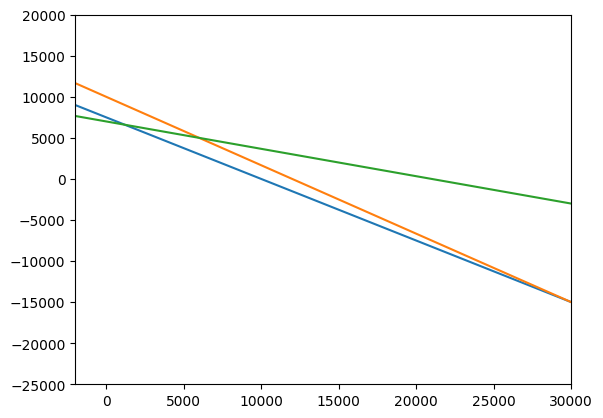

In [44]:
plt.plot(a,b1,)
plt.plot(a,b2)
plt.plot(a,b3)
plt.xlim((-2000,30000))
plt.ylim(-25000,20000)